# Отток клиентов

Из «Бета-Банка» стали уходить клиенты.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. 

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)


Описание данных:

Признаки
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — количество недвижимости у клиента
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

Целевой признак
- Exited — факт ухода клиента


# 1. Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import numpy as np
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


In [2]:
churn_data = pd.read_csv('/datasets/Churn.csv')

In [3]:
churn_data.info
display(churn_data.head(10))
#print(churn_data.corr())


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [4]:
churn_data.columns = [x.lower() for x in churn_data.columns]

Обнаружены пропуски в столбце Tenure, нет корреляции с другими столбцами. Заменим пропуски на среднее по столбцу

In [5]:
churn_data['tenure'] = churn_data['tenure'].fillna(round(churn_data['tenure'].mean()))
churn_data['tenure'] = churn_data['tenure'].astype('int')

churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
rownumber          10000 non-null int64
customerid         10000 non-null int64
surname            10000 non-null object
creditscore        10000 non-null int64
geography          10000 non-null object
gender             10000 non-null object
age                10000 non-null int64
tenure             10000 non-null int64
balance            10000 non-null float64
numofproducts      10000 non-null int64
hascrcard          10000 non-null int64
isactivemember     10000 non-null int64
estimatedsalary    10000 non-null float64
exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: creditscore, dtype: float64


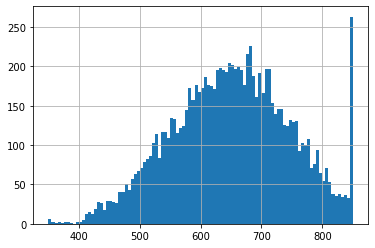

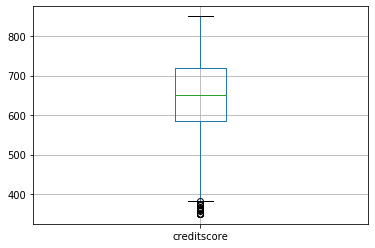

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64


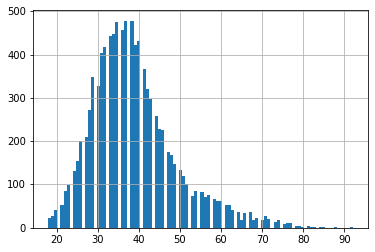

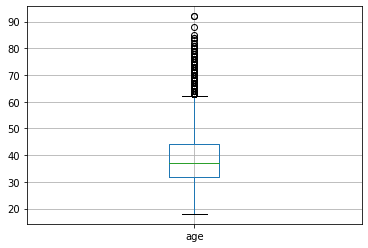

count    10000.00000
mean         4.99790
std          2.76001
min          0.00000
25%          3.00000
50%          5.00000
75%          7.00000
max         10.00000
Name: tenure, dtype: float64


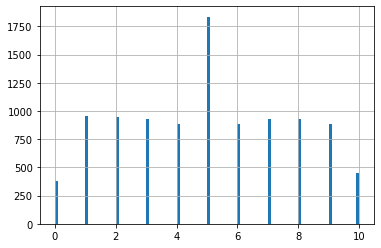

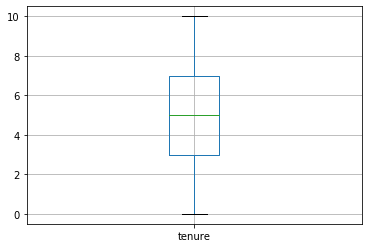

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: balance, dtype: float64


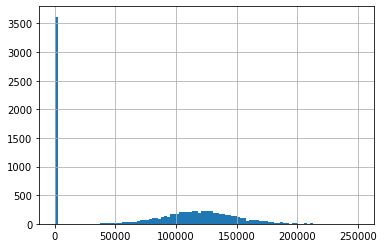

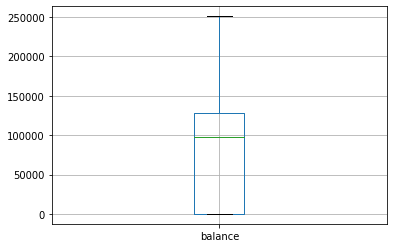

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: numofproducts, dtype: float64


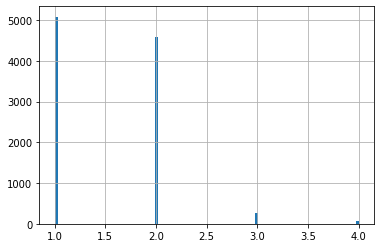

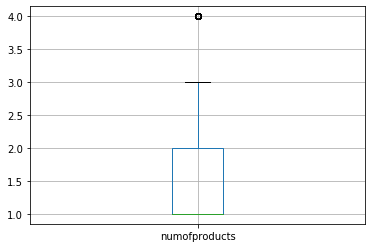

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: estimatedsalary, dtype: float64


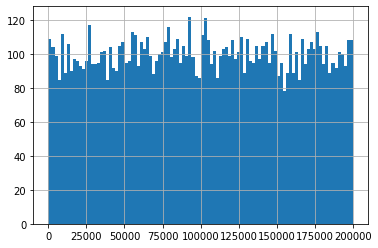

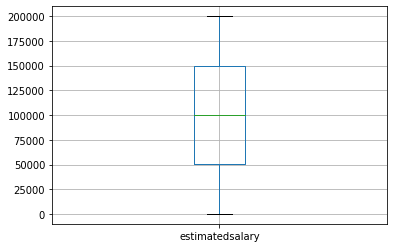

In [6]:
churn_columns = ('creditscore','age','tenure','balance','numofproducts','estimatedsalary')

for i in churn_columns:
   
    print(churn_data[i].describe())
    churn_data[i].hist(bins=100)
    plt.show()
    churn_data.boxplot(column=i)
    plt.show()


Обнаружил два выбивающихся значения в столбце с кредитным рейтингом, значение 850, а также баланс = 0. Решил избавиться от этих значений, так как рейтинг 850 максимальный, следовательно скорее всего это еще и рейтинг присваемый людям, которые не брали кредит. Баланс 0 - пользователи скорее всего не пользуются данным счетом. Оба этих значения искажают данные.

In [7]:
churn_data_clean = churn_data.query('creditscore != 850')
churn_data_clean = churn_data_clean.drop(churn_data_clean.columns[[0, 1, 2]], axis='columns')
warnings.simplefilter("ignore")
rows = []
churn_data_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9767 entries, 0 to 9999
Data columns (total 11 columns):
creditscore        9767 non-null int64
geography          9767 non-null object
gender             9767 non-null object
age                9767 non-null int64
tenure             9767 non-null int64
balance            9767 non-null float64
numofproducts      9767 non-null int64
hascrcard          9767 non-null int64
isactivemember     9767 non-null int64
estimatedsalary    9767 non-null float64
exited             9767 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 915.7+ KB


Убрал столбцы с фамилией, номер пользователя, индексом строки, так как они не являются инофрмативными 

In [8]:
churn_data_clean['exited'].value_counts()

0    7773
1    1994
Name: exited, dtype: int64

Наблюдается дисбаланс классов, разница между классами почти в 4 раза.

# 2. Исследование задачи

In [10]:
data_ohe = pd.get_dummies(churn_data_clean, drop_first=True)
target = data_ohe['exited']
features = data_ohe.drop('exited', axis=1)


features_train, features_valid, target_train, target_valid = \
    train_test_split(features, target, stratify=target, test_size=0.20, random_state=12345)


features_train, features_test, target_train, target_test = \
    train_test_split(features_train, target_train, stratify=target_train, test_size=0.25, random_state=12345)


print(features_train.shape, features_valid.shape, features_test.shape, \
      target_train.shape, target_valid.shape, target_test.shape)

numeric = ['creditscore','age','balance','numofproducts','estimatedsalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

#scaler.fit(features_train_grid[numeric]) ### не нужно
#features_train_grid_scaled = scaler.transform(features_train_grid[numeric]) ### не нужно


(5859, 11) (1954, 11) (1954, 11) (5859,) (1954,) (1954,)


Разделил данные на три выборки. Провел OHE-коидрование, удалил избыточные столбцы. Провел масштабирование данных.

In [11]:
def grid_func_dt(features, target, deep_first, deep_last):
    param_grid_dt = {'max_depth': [deep for deep in range(deep_first,deep_last)]}

    gs = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid_dt, scoring='f1')

    gs.fit(features, target)
    
    best_param = gs.best_params_
    max_depth_dt = gs.best_params_['max_depth']
    print('max_depth:',max_depth_dt)
    
    def func_dec_tree(features_train_dt, target_train_dt, features_valid_dt, target_valid_dt, model_tp):
        
        model = DecisionTreeClassifier(random_state=12345, max_depth=max_depth_dt)
        model.fit(features_train_dt, target_train_dt)
        
        predictions_valid = model.predict(features_valid_dt)
        predictions_train = model.predict(features_train_dt)
        
        probabilities_valid = model.predict_proba(features_valid_dt)
        probabilities_one_valid = probabilities_valid[:, 1]

        auc_roc = roc_auc_score(target_valid_dt, probabilities_one_valid)
        
        f1_train = f1_score(target_train_dt, predictions_train)
        f1_valid = f1_score(target_valid_dt, predictions_valid)
        
        fpr, tpr, threshold = metrics.roc_curve(target_valid_dt, probabilities_one_valid)
        roc_auc = metrics.auc(fpr, tpr)



        plt.title('Receiver Operating Characteristic')
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()    

        
        score = {'model':'Decision_tree', 'model_type': model_tp,\
                 'auc_roc': auc_roc, 'train_f1': f1_train, 'f1_score': f1_valid,
                'max_depth': max_depth_dt, 'n_estimators' : -1}
        
        
        return score

    return func_dec_tree



max_depth: 8


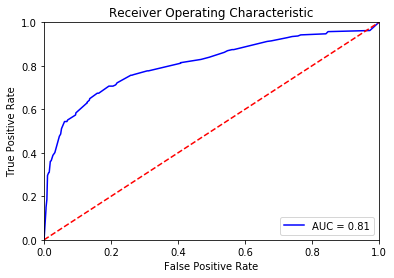

{'model': 'Decision_tree', 'model_type': 'classic', 'auc_roc': 0.8093521585313767, 'train_f1': 0.6629944917376064, 'f1_score': 0.5964912280701754, 'max_depth': 8, 'n_estimators': -1}


In [12]:
best_param_dt = grid_func_dt(features_train, target_train, 1, 16)
dec_tree_score = best_param_dt(features_train, target_train, 
                               features_valid, target_valid, 'classic')

print(dec_tree_score)

In [13]:
max_depth_dec_tree = dec_tree_score['max_depth']
rows.append(dec_tree_score)
#print(rows)
print(max_depth_dec_tree)

8


Написал функцию, которая подбирает оптимальный параметр для дерева решений относительно f1 значения, а также использует этот параметр для построения модели.


In [14]:
def grid_func_rf(features, target, deep_first, deep_last, n_first, n_last, n_step):
    

    param_grid_rf = {'max_depth': [deep for deep in range(deep_first, deep_last)],\
                     'n_estimators': [n for n in range(n_first, n_last, n_step)]}

    gs = GridSearchCV(RandomForestClassifier(), param_grid=param_grid_rf, scoring='f1')

    gs.fit(features, target)
    
    best_param = gs.best_params_
    max_depth_rf = gs.best_params_['max_depth']
    n_estimators_rf = gs.best_params_['n_estimators']
    
    print('max_depth:', max_depth_rf)
    print('n_estimators:', n_estimators_rf)
    
    def func_rand_forest(features_train_rf, target_train_rf, features_valid_rf, target_valid_rf, model_tp):
        
        model = RandomForestClassifier(random_state=12345,
                                       n_estimators=n_estimators_rf,
                                       max_depth=max_depth_rf)
        model.fit(features_train_rf, target_train_rf)
        
        predictions_valid = model.predict(features_valid_rf)
        predictions_train = model.predict(features_train_rf)
        
        probabilities_valid = model.predict_proba(features_valid_rf)
        probabilities_one_valid = probabilities_valid[:, 1]

        auc_roc = roc_auc_score(target_valid_rf, probabilities_one_valid)
        
        f1_train = f1_score(target_train_rf, predictions_train)
        f1_valid = f1_score(target_valid_rf, predictions_valid)
        
        fpr, tpr, threshold = metrics.roc_curve(target_valid_rf, probabilities_one_valid)
        roc_auc = metrics.auc(fpr, tpr)

        plt.title('Receiver Operating Characteristic')
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()    
        
        
        score = {'model':'Random_forest', 'model_type': model_tp,
                'auc_roc': auc_roc, 'train_f1': f1_train, 'f1_score': f1_valid,
                'max_depth': max_depth_rf, 'n_estimators' : n_estimators_rf}
        
        
        return score

    return func_rand_forest

max_depth: 15
n_estimators: 51


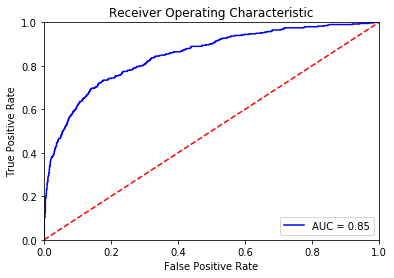

{'model': 'Random_forest', 'model_type': 'classic', 'auc_roc': 0.8490543077952115, 'train_f1': 0.9636048526863085, 'f1_score': 0.5670261941448381, 'max_depth': 15, 'n_estimators': 51}


In [15]:
best_param_rf = grid_func_rf(features_train, target_train, 1, 16, 1 ,100, 10)
rand_forest_score = best_param_rf(features_train, target_train, features_valid, target_valid, 'classic')

print(rand_forest_score)

Функция для случайного леса.

In [16]:
max_depth_rand_for = rand_forest_score['max_depth']
n_estimators_rand_for = rand_forest_score['n_estimators']
rows.append(rand_forest_score)
print('Глубина:', max_depth_rand_for, 'Количество деревьев:',n_estimators_rand_for)
#print(rows)

Глубина: 15 Количество деревьев: 51


In [17]:
def func_lr(features_train, target_train, features_valid, target_valid, model_tp):
    model = LogisticRegression(random_state=12345, solver='liblinear') # модель логистическая регрессия

    model.fit(features_train, target_train)

    predictions_valid = model.predict(features_valid)
    predictions_train = model.predict(features_train)

    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    
    
    f1_train = f1_score(target_train, predictions_train)
    f1_valid = f1_score(target_valid, predictions_valid)
    
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    
    fpr, tpr, threshold = metrics.roc_curve(target_valid, probabilities_one_valid)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()    
    
    score = {'model':'Logistic_regression', 'model_type': model_tp, 
             'auc_roc': auc_roc, 'train_f1': f1_train, 'f1_score': f1_valid,
             'max_depth': -1, 'n_estimators' : -1}
    

    return score

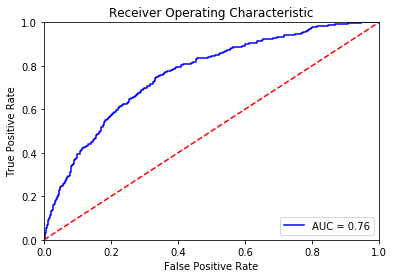

{'model': 'Logistic_regression', 'model_type': 'classic', 'auc_roc': 0.7621062302057395, 'train_f1': 0.3282114320835894, 'f1_score': 0.29259259259259257, 'max_depth': -1, 'n_estimators': -1}


In [18]:
log_reg_score = func_lr(features_train, target_train, features_valid, target_valid, 'classic')
print(log_reg_score)

In [19]:
rows.append(log_reg_score)
#print(rows)

    В целом все модели показали меньший результат, чем необходим, стоит заняться балансировкой классов. Модель логистическая регрессия показала самый плохой результаты. Значения f1  и данные модели были внесены в список.

# 3. Борьба с дисбалансом

Сбалансируем классы и проверим модели еще раз. Так как данных не так много, увеличим меньший класс.

In [20]:
churn_data_clean['exited'].value_counts()

0    7773
1    1994
Name: exited, dtype: int64

Данные несбалансированы , "1" почти в 4 раза меньше, чем "0".

In [21]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4) 


max_depth: 8


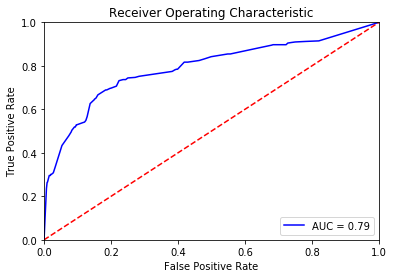

{'model': 'Decision_tree', 'model_type': 'upsampled', 'auc_roc': 0.789342326878289, 'train_f1': 0.8271514132604812, 'f1_score': 0.5650406504065041, 'max_depth': 8, 'n_estimators': -1}


In [22]:
best_param_dt_up = grid_func_dt(features_upsampled, target_upsampled, max_depth_dec_tree, max_depth_dec_tree + 1)
dec_tree_score_up = best_param_dt_up(features_upsampled, target_upsampled,\
                                     features_valid, target_valid, 'upsampled')

print(dec_tree_score_up)

Здесь использовал гиперпараметры, подобранные на этапе 2. 

In [23]:
rows.append(dec_tree_score_up)

max_depth: 15
n_estimators: 51


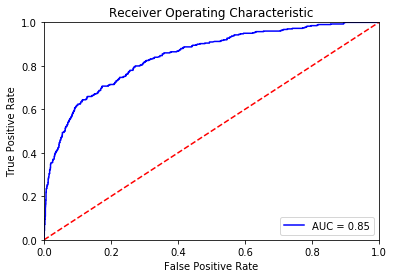

{'model': 'Random_forest', 'model_type': 'upsampled', 'auc_roc': 0.8464239376576489, 'train_f1': 0.9968743488226713, 'f1_score': 0.608355091383812, 'max_depth': 15, 'n_estimators': 51}


In [24]:
best_param_rf_up = grid_func_rf(features_upsampled, target_upsampled, max_depth_rand_for, max_depth_rand_for + 1,
                                n_estimators_rand_for, n_estimators_rand_for + 1, 1)
rand_forest_score_up = best_param_rf_up(features_upsampled, target_upsampled,\
                                     features_valid, target_valid, 'upsampled')

print(rand_forest_score_up)

In [25]:
rows.append(rand_forest_score_up)

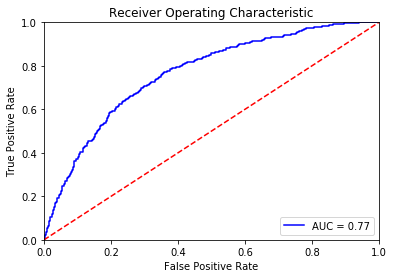

{'model': 'Logistic_regression', 'model_type': 'upsampled', 'auc_roc': 0.7650476674000114, 'train_f1': 0.7012053288221611, 'f1_score': 0.49131944444444453, 'max_depth': -1, 'n_estimators': -1}


In [26]:
log_reg_score_up = func_lr(features_upsampled, target_upsampled, features_valid, target_valid, 'upsampled')
print(log_reg_score_up) 

In [27]:
rows.append(log_reg_score_up)

### Предварительный итог
Проверил модели с увеличенным классом, рассматривал масшатабированные и не масшатабированные данные.
Лучшей моделью окозалась случайный лес с масштабированием

Попробуем сбалансировать с помощью уменьшения большего класса.

In [28]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

max_depth: 8


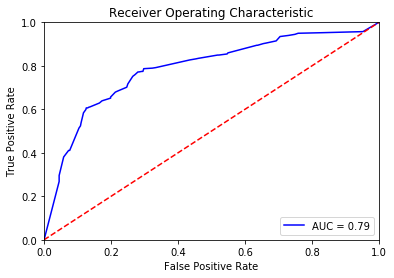

{'model': 'Decision_tree', 'model_type': 'downsampled', 'auc_roc': 0.7870826584145251, 'train_f1': 0.8480413258717174, 'f1_score': 0.5268109125117593, 'max_depth': 8, 'n_estimators': -1}


In [29]:
best_param_dt_down = grid_func_dt(features_downsampled, target_downsampled, max_depth_dec_tree, max_depth_dec_tree + 1)
dec_tree_score_down = best_param_dt_down(features_downsampled, target_downsampled,\
                                     features_valid, target_valid, 'downsampled')

print(dec_tree_score_down)

In [30]:
rows.append(dec_tree_score_down)

max_depth: 15
n_estimators: 51


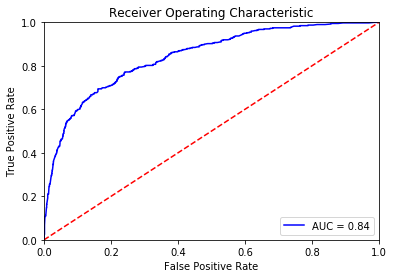

{'model': 'Random_forest', 'model_type': 'downsampled', 'auc_roc': 0.8429868884429724, 'train_f1': 0.9995821145006268, 'f1_score': 0.5703275529865125, 'max_depth': 15, 'n_estimators': 51}


In [31]:
best_param_rf_down = grid_func_rf(features_downsampled, target_downsampled, max_depth_rand_for, max_depth_rand_for + 1,
                                n_estimators_rand_for, n_estimators_rand_for + 1, 1)
rand_forest_score_down = best_param_rf_down(features_downsampled, target_downsampled,\
                                     features_valid, target_valid, 'downsampled')

print(rand_forest_score_down)

In [32]:
rows.append(rand_forest_score_down)

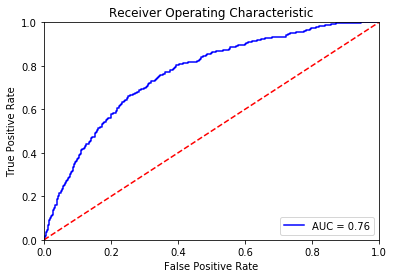

{'model': 'Logistic_regression', 'model_type': 'downsampled', 'auc_roc': 0.7645641434776651, 'train_f1': 0.7016060862214709, 'f1_score': 0.48437499999999994, 'max_depth': -1, 'n_estimators': -1}


In [33]:
log_reg_score_down = func_lr(features_downsampled, target_downsampled,\
                             features_valid, target_valid, 'downsampled')
print(log_reg_score_down)


In [34]:
rows.append(log_reg_score_down)

В целом увеличение меньшего класса показало лучший результат, так как данных было не очень много. Логично именно увеличить класс, а не уменьшать его

### ИТОГ

In [35]:
table_f1 = pd.DataFrame(rows)
table_f1_score = table_f1.sort_values(by='f1_score', ascending=False).reset_index(drop=True)
display(table_f1_score)
max_depth_final = table_f1_score.get_value(0,'max_depth') 
n_estimators_final = table_f1_score.get_value(0,'n_estimators')
model_type_final = table_f1_score.get_value(0,'model_type')

,model,model_type,auc_roc,train_f1,f1_score,max_depth,n_estimators
0,Random_forest,upsampled,0.846424,0.996874,0.608355,15,51
1,Decision_tree,classic,0.809352,0.662994,0.596491,8,-1
2,Random_forest,downsampled,0.842987,0.999582,0.570328,15,51
3,Random_forest,classic,0.849054,0.963605,0.567026,15,51
4,Decision_tree,upsampled,0.789342,0.827151,0.565041,8,-1
5,Decision_tree,downsampled,0.787083,0.848041,0.526811,8,-1
6,Logistic_regression,upsampled,0.765048,0.701205,0.491319,-1,-1
7,Logistic_regression,downsampled,0.764564,0.701606,0.484375,-1,-1
8,Logistic_regression,classic,0.762106,0.328211,0.292593,-1,-1


Модель, показавшая удовлетворительный результат, - случайный лес с увеличением класса.
Проверим на тестовой выборке

# 4. Тестирование модели

max_depth: 15
n_estimators: 51


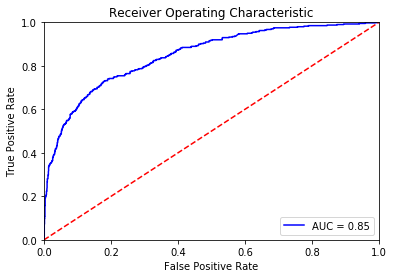

{'model': 'Random_forest', 'model_type': 'upsampled', 'auc_roc': 0.8491260305103593, 'train_f1': 0.9968743488226713, 'f1_score': 0.6103038309114928, 'max_depth': 15, 'n_estimators': 51}


In [36]:
best_param_rf_final = grid_func_rf(features_upsampled, target_upsampled, max_depth_final,
                                   max_depth_final + 1, n_estimators_final, n_estimators_final + 1, 1)
rand_forest_score_final = best_param_rf_final(features_upsampled, target_upsampled,\
                                     features_test, target_test, model_type_final)

print(rand_forest_score_final)

Модель показала нужный результат выше 0.59 на тестовой выборке, а именно f1 = 0.61

# Выводы

Проведена предобработка данных:
- Удалены пропуски
- Удалены столбцы, которые не являлись информативными
- Обнаружены выпадающие значени, которые были исключены при дальнейшем рассмотрении

Ислледование:
- Обучено три различных модели : Decision Tree, Random Forest, Linear Regression
- Для моделей написаны функции, где на вход принимаются данные по признакам. Подбираются наилучшие гиперпараметры, в зависимости от значения F1-меры
- Проведены исследования на эффективность моделей при увеличении меньшего класса и уменьшении большего

По итогу была выбрана модель случайного леса, с увеличенным меньшим классом, которая показала значение F1-меры на тестовой выборке в 0.61.